In [1]:
import os
import numpy as np

import mlflow
from mlflow import MlflowClient
from mlflow.entities import ViewType

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# %matplotlib widget
%matplotlib inline

In [18]:
tracking_uri = os.path.expanduser('~/mlruns/')
experiment_name = os.path.basename(os.getcwd())

In [19]:
experiment_name

'blo'

In [4]:
del mcolors.TABLEAU_COLORS['tab:pink']
colors = list(mcolors.TABLEAU_COLORS.keys())
markers = ['o', '<', '>', 'v', 's', 'D', '*']

In [13]:
label_key = 'optimizer'
metric_key = 'loss'

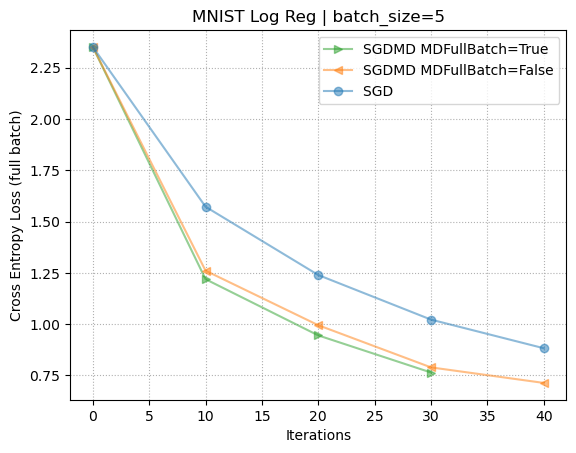

In [90]:
client = MlflowClient(tracking_uri=tracking_uri)
e = client.get_experiment_by_name(experiment_name)
runs = client.search_runs(experiment_ids=[e.experiment_id],
                          filter_string='',
                          run_view_type=ViewType.ACTIVE_ONLY)

optimizer_names = ['SGD']
for r in runs:
    config = mlflow.artifacts.load_dict(r.info.artifact_uri+'/config.json')

    if config['batch_size'] != 5:
        continue
    title = 'MNIST Log Reg | batch_size=' + str(config['batch_size'])
    beg = 0
    end = 120000

    label = config[label_key]['name'] + ' ' + r.data.params['Title']
    i = config[label_key]['id'] + int(config['md_full'])
    history = client.get_metric_history(run_id=r.info.run_id, key=metric_key)
    y = np.array([h.value for h in history])
    x = np.array([h.timestamp for h in history])
    x = np.array([h.step for h in history])
    mask = (x >= beg)*(x <= end)
    x, y = x[mask], y[mask]

    plt.plot(x, y,
             alpha=0.5, color=colors[i],
             marker=markers[i], markevery=1,
             label=label)

    # print()
# title = '%s, bs=%i' % (an, bs)
# title = 'MNIST Log Reg'
plt.title(title)
plt.xlabel('Iterations')
plt.ylabel('Cross Entropy Loss (full batch)')
# plt.yscale('log')
plt.xscale('linear')
plt.grid(True, which="both", ls='dotted')
plt.legend()
plt.savefig('figures/'+ title +'.pdf', bbox_inches='tight')
# plt.savefig(title +'.pdf', bbox_inches='tight')
plt.show()